# I Just Felt Like Running

### Running on 365 consecutive days for no other reason

March 2017 was a bad month for my running -- I only ran [four times](http://smashrun.com/ixjlyons/overview/2017/3). By early April, I decided it would be cool to try to go on a little run streak to get things going again. At first, I think the goal was 10 days straight. And after that, 20 days. And then, I decided to make my longest streak longer than my longest break (34 days). You get the point. Now here we are, 365 days later.

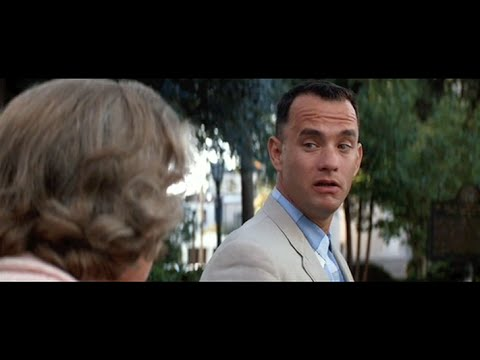

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('2zKl2wgrlKw')

I use Runkeeper on my phone to track GPS coordinates of every run I go on, so in commemoration of an aribtrary set of 365 consecutive days, I thought it'd be cool to take a look at the data.

On Runkeeper, you can go to Settings, then Export Data, and select the appropriate date range. This gives you a zip file containing a CSV file (`cardioActivities.csv`) summarizing every tracked activity, and a [GPX](https://en.wikipedia.org/wiki/GPS_Exchange_Format) file for each activity containing the GPS coordinates sampled every few seconds.

## Summary

I'll start with `cardioActivities.csv` to just get a summary of how the year went.

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

datadir = 'activities'
summary_csv = os.path.join(datadir, 'cardioActivities.csv')

activities = pd.read_csv(summary_csv)
activities.head()

,Date,Type,Route Name,Distance (km),Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm),Notes,GPX File
0,2018-04-07 09:21:31,Running,NaN,3.65,18:14,5:00,12.00,315.0,2,NaN,NaN,2018-04-07-0921.gpx
1,2018-04-06 07:30:17,Running,NaN,2.66,13:57,5:15,11.43,229.0,2,NaN,NaN,2018-04-06-0730.gpx
2,2018-04-05 18:12:03,Running,NaN,5.68,30:00,5:17,11.35,491.0,5,NaN,NaN,2018-04-05-1812.gpx
3,2018-04-04 07:53:16,Running,NaN,5.37,27:36,5:09,11.66,464.0,4,NaN,NaN,2018-04-04-0753.gpx
4,2018-04-03 09:02:23,Running,NaN,5.61,28:27,5:04,11.83,483.0,1,NaN,NaN,2018-04-03-0902.gpx


The data needs a little cleaning up by removing cycling activities (tracked during [May is Bike Month](https://mayisbikemonth.com/)) and converting the `Date` column to a proper datetime type. I also want to aggregate data for days on which I ran multiple times (usually to and from a location), so I can add a separate column for the full date+time and remove the time from the date column.

In [3]:
activities = activities[activities.Type == 'Running']
activities['Datetime'] = pd.to_datetime(activities['Date'])
activities['Date'] = activities['Datetime'].dt.normalize()
activities.head()

,Date,Type,Route Name,Distance (km),Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm),Notes,GPX File,Datetime
0,2018-04-07,Running,NaN,3.65,18:14,5:00,12.00,315.0,2,NaN,NaN,2018-04-07-0921.gpx,2018-04-07 09:21:31
1,2018-04-06,Running,NaN,2.66,13:57,5:15,11.43,229.0,2,NaN,NaN,2018-04-06-0730.gpx,2018-04-06 07:30:17
2,2018-04-05,Running,NaN,5.68,30:00,5:17,11.35,491.0,5,NaN,NaN,2018-04-05-1812.gpx,2018-04-05 18:12:03
3,2018-04-04,Running,NaN,5.37,27:36,5:09,11.66,464.0,4,NaN,NaN,2018-04-04-0753.gpx,2018-04-04 07:53:16
4,2018-04-03,Running,NaN,5.61,28:27,5:04,11.83,483.0,1,NaN,NaN,2018-04-03-0902.gpx,2018-04-03 09:02:23


Now for the aggregation. Distance should be accumulated by adding up all runs for a day, whereas it makes a bit more sense to just average the speed for different runs on a day.

In [4]:
activities = activities.groupby('Date').agg({
    'Distance (km)': np.sum,
    'Average Speed (km/h)': np.mean,
    'Calories Burned': np.sum,
    'Climb (m)': np.sum,
}).reset_index()

activities.describe()

,Distance (km),Average Speed (km/h),Calories Burned,Climb (m)
count,365.000000,365.000000,365.000000,365.000000
mean,7.269151,11.612251,628.715068,11.394521
std,4.485533,0.927397,390.872166,33.269181
min,1.870000,4.520000,64.000000,0.000000
25%,4.540000,11.230000,393.000000,2.000000
50%,6.060000,11.650000,523.000000,4.000000
75%,9.290000,12.100000,816.000000,9.000000
max,42.220000,14.950000,3654.000000,383.000000


There, now we have exactly 365 rows. One measurement of interest is the total distance run for the year.

In [5]:
activities['Distance (km)'].sum()

2653.24

In terms of distance between state capitols, that's pretty close to Google's estimate of the [walking distance from Sacramento, CA to Topeka, KS](https://www.google.com/maps/dir/sacramento/topeka/@39.2229955,-117.5752175,5z/data=!3m1!4b1!4m14!4m13!1m5!1m1!1s0x809ac672b28397f9:0x921f6aaa74197fdb!2m2!1d-121.4943996!2d38.5815719!1m5!1m1!1s0x87bf02e4daec7a29:0xbe2be7d06ae3a7f0!2m2!1d-95.6890185!2d39.0558235!3e2).

Aside from total distance, I've been interested in seeing my run distance per day for the year.

Text(0,0.5,'distance per day (km)')

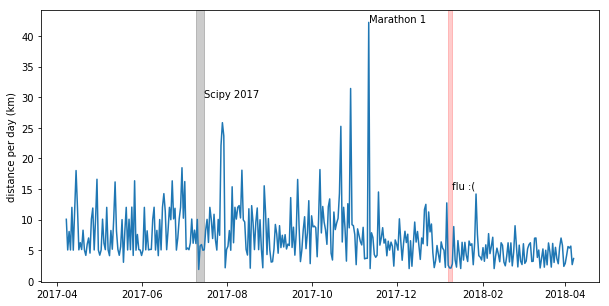

In [6]:
import matplotlib.dates as mdates
import datetime

ax = plt.figure(figsize=(10, 5)).gca()

ax.plot(activities['Date'], activities['Distance (km)'])

def annotate_date(label, date, y, ax, **kwargs):
    def datestr2num(s):
        return mdates.date2num(datetime.datetime(*(int(i) for i in s.split('-'))))
    ax.annotate(label, xy=(datestr2num(date), y), **kwargs)

ax.axvspan('2017-07-10', '2017-07-16', color='k', alpha=0.2)
annotate_date('Scipy 2017', '2017-07-16', 30, ax)

annotate_date('Marathon 1', '2017-11-11', 42.2, ax)

ax.axvspan('2018-01-07', '2018-01-10', color='r', alpha=0.2)
annotate_date('flu :(', '2018-01-10', 15, ax)

ax.set_ylabel('date')
ax.set_ylabel('distance per day (km)')

You can see that I started out without dipping below 5km/day very much, had a couple rough days (SciPy 2017), then started training for my first marathon. After the marathon, things started falling apart and I started taking more 2-3km days. I also started lifting weights pretty seriously in December, which really saps day-to-day energy levels. 2018 also started off great with a pretty gnarly flu of some kind. I'm actually not sure if running with the flu for a few days was easier or harder than running the day after the marathon.

## Looking at the GPS Data

I had been planning to do some neat analyses, but I'm going to leave it alone for now with a pretty picture that I can use for my Twitter banner or something.

I've run in a few places other than my home town, so I'll narrow things down to a bounding box around Davis, CA.

In [7]:
xlim = -121.8045788, -121.674863,
ylim = 38.512625, 38.5765569

I need to re-read the summary CSV file because I got rid of the "GPX File" column earlier.

In [8]:
activities = pd.read_csv(summary_csv)
activities = activities[activities.Type == 'Running']

Now I can make use of a nice library called [gpxpy](https://github.com/tkrajina/gpxpy) to parse the GPX files and extract the GPS coordinates from them.

In [9]:
import gpxpy

def loadgpx(fpath):
    with open(fpath, 'r') as f:
        return gpxpy.parse(f)

def points(gpx):
    xy = np.zeros((gpx.get_points_no(), 2))
    for i, p in enumerate(gpx.walk(only_points=True)):
        xy[i] = p.longitude, p.latitude
    return xy

Now generate the plot by iterating over GPX files and plotting the coordinates along the way. This takes a little while to run, so I downsample the coordinates to about 1 sample every 15 seconds or so.

(38.512625, 38.5765569)

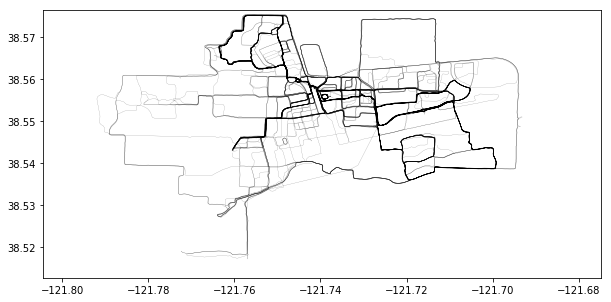

In [10]:
width = xlim[1] - xlim[0]
height = ylim[1] - ylim[0]
ratio = abs(width / height)

fig = plt.figure(figsize=(10, 10/ratio))
ax = fig.gca()

for fname in activities['GPX File']:
    fp = os.path.join(datadir, fname)
    xy = points(loadgpx(fp))[::5, :]
    ax.plot(xy[:, 0], xy[:, 1], lw=0.2, alpha=0.5, color='k')
    
ax.set_xlim(*xlim)
ax.set_ylim(*ylim)

In [11]:
fig.savefig('map.png', dpi=600)

## Conclusions

The question now is, do I run tomorrow?